## 卷积运算的python实现

In [3]:
def conv(a,b):
    N = len(a);
    M = len(b);
    YN = N + M -1;
    y = [0.0 for i in range(YN)];
    #print(y);
    for n in range(YN):
        for m in range(M):
            if 0 <= n - m and n - m <N:
                y[n] += a[n - m] * b[m];
    return y;

In [4]:
import numpy as np
def conv2(a,b):
    N = len(a);
    M = len(b);
    YN = N + M -1;
    y = [0.0 for i in range(YN)];
    b = np.array(b)[::-1];
    for n in range(YN):
        for m in range(M):
            k = n - M + m +1;
            if 0 <= k and k < N:
                y[n] += a[k] * b[m];
    return y;        
        

测试

In [3]:
if __name__ == '__main__':
    a = [0,1,2,3];
    b = [0,1,2];
    print(conv(a,b));
    print(np.convolve(a,b));

[0.0, 0.0, 1.0, 4.0, 7.0, 6.0]
[0 0 1 4 7 6]


FFT计算卷积

In [5]:
def convfft(a,b):
    N = len(a);
    M = len(b);
    YN = N + M -1;
    FFT_N = 2 ** (int(np.log2(YN)) + 1);
    afft = np.fft.fft(a,FFT_N);
    bfft = np.fft.fft(b,FFT_N);
    abfft = afft*bfft;
    y = np.fft.ifft(abfft).real[:YN];
    return y;

测试

In [5]:
if __name__ == '__main__':
    a = [1,2,3,4];
    b = [1,2,3];
    print(conv2(a,b));
    print(convfft(a,b));
    print(np.convolve(a,b));

[1.0, 4.0, 10.0, 16.0, 17.0, 12.0]
[ 1.  4. 10. 16. 17. 12.]
[ 1  4 10 16 17 12]


比较运行时间

In [6]:
def time_test():
    import time
    import matplotlib.pyplot as plt
    
    def run(func , a, b):
        n = 1;
        start = time.clock();
        for j in range(n):
            func(a,b);
        end = time.clock();
        run_time = end - start;
        return run_time/n;
    n_list = [];
    t1_list = [];
    t2_list = [];
    t3_list = [];
    for i in range(10):
        count = i * 1000 +10;
        #print(count);
        a = np.ones(count);
        b = np.ones(count);
        t1 = run(conv,a,b);
        t2 = run(conv2,a,b);
        t3 = run(convfft,a,b);
        
        n_list.append(count);
        t1_list.append(t1);
        t2_list.append(t2);
        t3_list.append(t3);
        %matplotlib inline
        plt.plot(n_list,t1_list,label='conv');
        plt.plot(n_list,t2_list,label='conv2');
        plt.plot(n_list,t3_list,label='convfft');
        
        plt.legend();
        plt.title(u'convolve times');
        plt.ylabel(u'run times(ms/point)');
        plt.xlabel(u'length');
        plt.show()

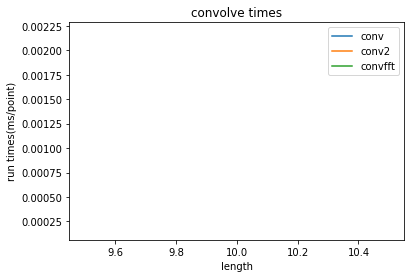

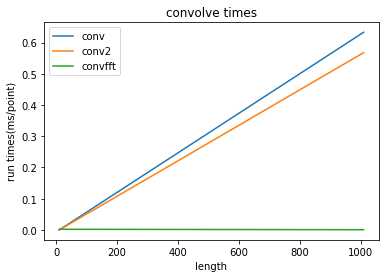

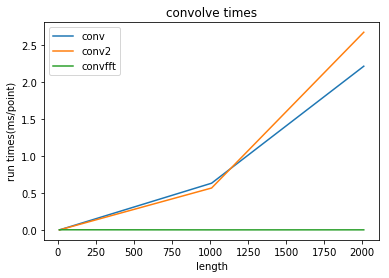

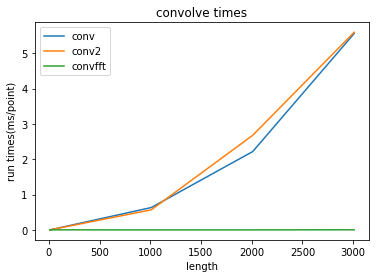

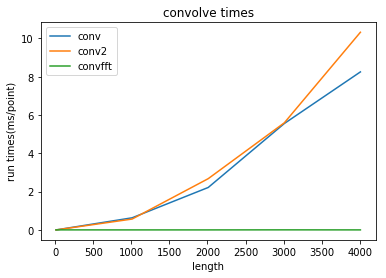

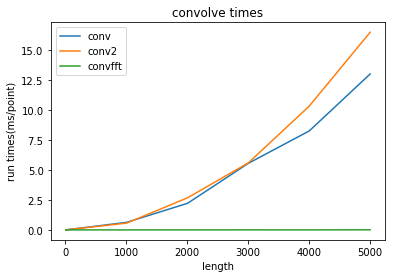

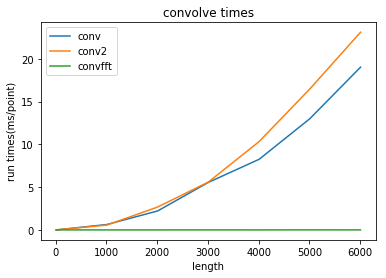

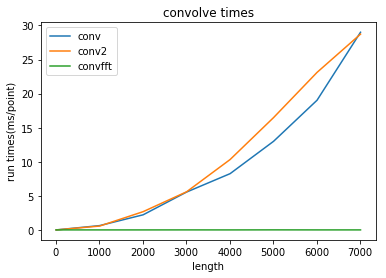

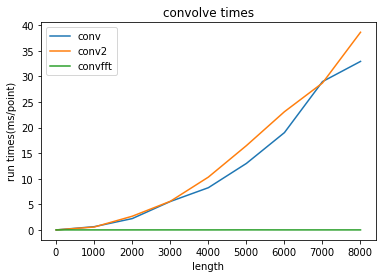

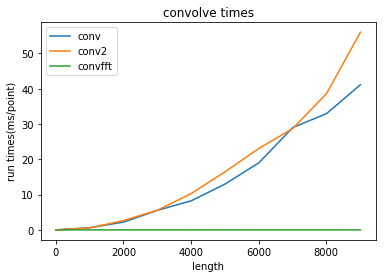

In [7]:
time_test()

In [7]:
import numpy as np
A = np.zeros([3,4])
a = A.shape
print(a);
for i,p in range(a):
    print(i,p);

(3, 4)


TypeError: 'tuple' object cannot be interpreted as an integer